<a href="https://colab.research.google.com/github/DivicM/UUI/blob/main/UUI_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [4]:
!pip install -q tensorflow-datasets

In [5]:
import tensorflow_datasets as tfds

(ds_train, ds_test), info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.PGIBI9_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.PGIBI9_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.


In [6]:
# Pretvaranje ds_train u NumPy nizove
x_train_list = []
y_train_list = []
for image, label in ds_train:
    x_train_list.append(image.numpy()) # Pretvaramo tensor u NumPy niz
    y_train_list.append(label.numpy())

x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

# Pretvaranje ds_test u NumPy nizove
x_test_list = []
y_test_list = []
for image, label in ds_test:
    x_test_list.append(image.numpy()) # Pretvaramo tensor u NumPy niz
    y_test_list.append(label.numpy())

x_test = np.array(x_test_list)
y_test = np.array(y_test_list)

print(f"Oblici nakon podjele:\nx_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Oblici nakon podjele:
x_train: (88800, 28, 28, 1), y_train: (88800,)
x_test: (14800, 28, 28, 1), y_test: (14800,)


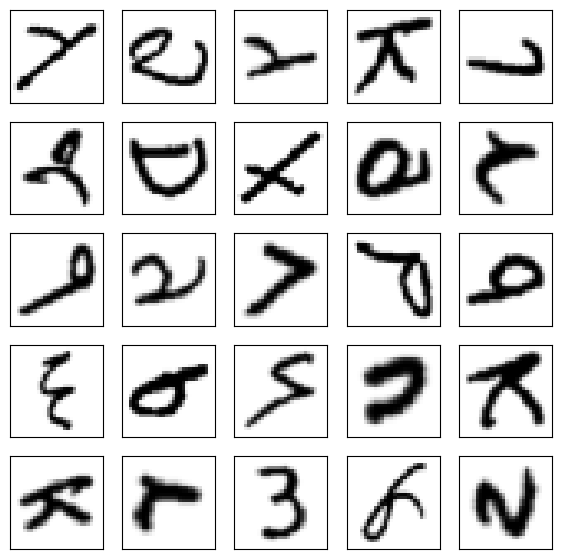

In [7]:
fig = plt.figure(figsize=(7, 7))

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='binary')

In [8]:
x_train = x_train.reshape((88800, 28, 28, 1))
x_train = x_train.astype('float32') / 255

In [9]:
x_test = x_test.reshape((14800, 28, 28, 1))
x_test = x_test.astype('float32') / 255

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Input

In [11]:
model1 = Sequential()
model1.add(Input(shape=(28, 28, 1)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(37, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,269 (1.23 MB)

 Trainable params: 321,269 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

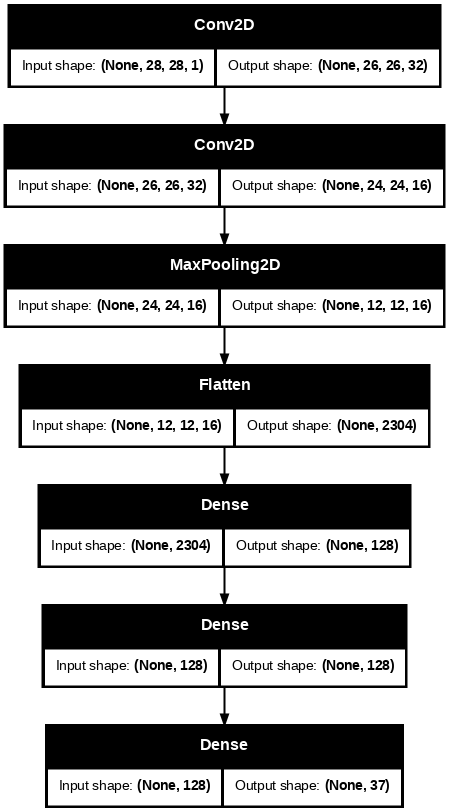

In [12]:
tf.keras.utils.plot_model(model=model1, dpi=72, show_shapes=True)

In [13]:
model1.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7003 - loss: 1.0181 - val_accuracy: 0.8896 - val_loss: 0.3417
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9056 - loss: 0.2865 - val_accuracy: 0.9074 - val_loss: 0.2846
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9267 - loss: 0.2155 - val_accuracy: 0.9196 - val_loss: 0.2494
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9398 - loss: 0.1724 - val_accuracy: 0.9189 - val_loss: 0.2527
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9454 - loss: 0.1488 - val_accuracy: 0.9136 - val_loss: 0.2758


In [14]:
prediction1=model1.predict(x_test)
prediction1[1]

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.6118362e-07, 1.1049159e-03, 1.0989123e-04, 3.3526342e-07,
       3.2200223e-08, 1.5521803e-06, 1.6619639e-06, 8.6137597e-06,
       9.9176639e-01, 4.2783340e-05, 1.7393751e-05, 6.8616024e-03,
       3.3756023e-05, 5.4927586e-06, 1.8543535e-06, 7.1634054e-07,
       1.1977157e-07, 6.4251316e-07, 3.2586222e-06, 1.0862479e-05,
       1.2720323e-05, 1.8009298e-06, 1.8159265e-07, 1.8891670e-07,
       5.3286713e-06, 6.8613663e-06, 9.9199519e-07, 1.9945836e-09,
       6.0453714e-10, 7.3531905e-09, 7.6297585e-10, 1.1747081e-10,
       7.2676816e-11, 1.1337089e-08, 4.2986722e-11, 3.2655796e-09,
       2.8120184e-10], dtype=float32)

In [15]:
loss1, accuracy1=model1.evaluate(x_train,y_train)
print(loss1)
print(accuracy1)

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9449 - loss: 0.1476
0.17260995507240295
0.9393355846405029


In [16]:
loss1, accuracy1=model1.evaluate(x_test,y_test)
print(loss1)
print(accuracy1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9049 - loss: 0.2958
0.29349374771118164
0.9052702784538269


In [17]:
model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(37, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,765 (475.64 KB)

 Trainable params: 121,765 (475.64 KB)

 Non-trainable params: 0 (0.00 B)

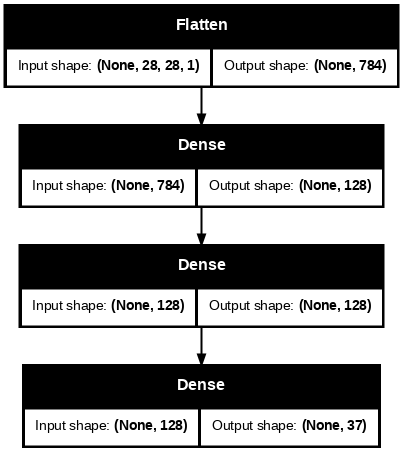

In [18]:
tf.keras.utils.plot_model(model=model2, dpi=72, show_shapes=True)

In [19]:
model2.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6135 - loss: 1.3484 - val_accuracy: 0.8303 - val_loss: 0.5610
Epoch 2/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8472 - loss: 0.4926 - val_accuracy: 0.8565 - val_loss: 0.4666
Epoch 3/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8798 - loss: 0.3788 - val_accuracy: 0.8806 - val_loss: 0.3858
Epoch 4/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8958 - loss: 0.3255 - val_accuracy: 0.8770 - val_loss: 0.3939
Epoch 5/5
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9051 - loss: 0.2836 - val_accuracy: 0.8855 - val_loss: 0.3630


In [20]:
prediction2=model2.predict(x_test)
prediction2[1]

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.6794214e-11, 3.6465836e-04, 1.2550922e-03, 4.6863398e-09,
       3.7062157e-06, 4.3907085e-06, 1.7366311e-04, 1.2874322e-06,
       9.8406237e-01, 2.5688589e-06, 1.2838992e-05, 1.0855440e-02,
       3.5263231e-05, 4.5539670e-07, 1.9475896e-05, 2.6090984e-08,
       1.8601769e-08, 6.4666899e-08, 9.7348006e-05, 2.8090071e-07,
       3.0944054e-03, 2.9917155e-07, 2.5021295e-08, 4.0451919e-06,
       1.1614825e-05, 9.2859416e-08, 5.8848809e-07, 2.8861333e-10,
       1.0769399e-10, 1.8537465e-10, 9.6712270e-11, 3.5198802e-10,
       4.1481443e-10, 6.3662675e-10, 1.6100683e-10, 1.7743346e-10,
       1.8782793e-10], dtype=float32)

In [21]:
loss2, accuracy2=model2.evaluate(x_train,y_train)
print(loss2)
print(accuracy2)

2775/2775 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9182 - loss: 0.2399
0.26314690709114075
0.9124887585639954


In [22]:
loss2, accuracy2=model2.evaluate(x_test,y_test)
print(loss2)
print(accuracy2)

463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8728 - loss: 0.3915
0.4000961184501648
0.871486485004425


In [23]:
pogresni = []
for i, (pred, labela) in enumerate(zip(prediction2, y_test)):
  if np.argmax(pred) != labela:
    pogresni.append((i, np.argmax(pred), labela, prediction2[i]))

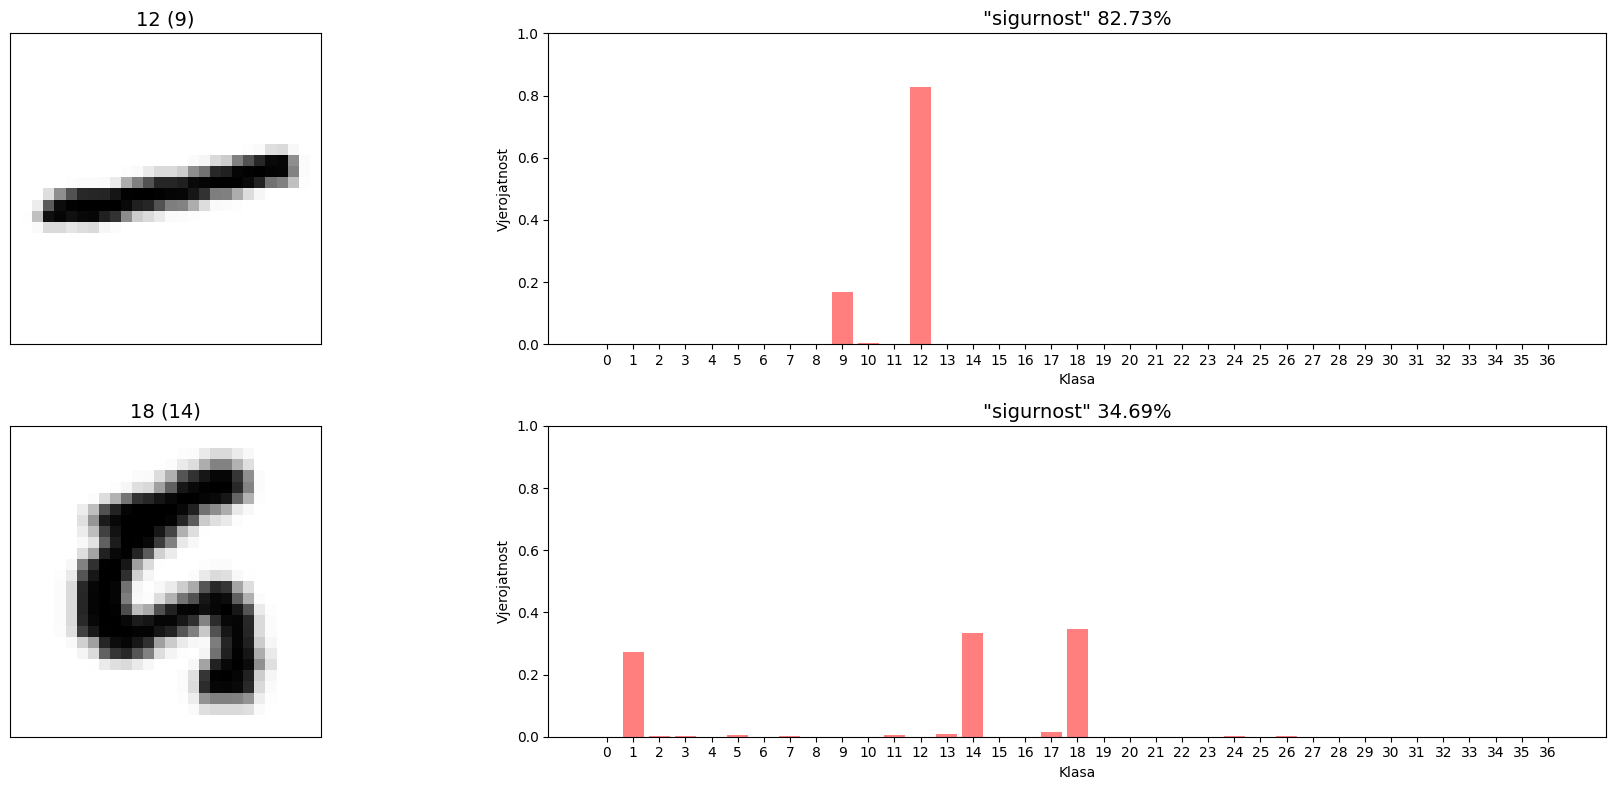

In [24]:
fig = plt.figure(figsize=(20, 8))
cnt = 0

for idx, (i, pred, tocno, pred_vjerojatnosti) in enumerate(random.sample(pogresni, 2)):

  ax1 = plt.subplot(2, 2, cnt + 1)
  plt.title("{} ({})".format(pred, tocno), fontsize=14)
  plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
  plt.xticks([]), plt.yticks([])


  ax2 = plt.subplot(2, 2, cnt + 2)
  sigurnost = pred_vjerojatnosti[pred] * 100
  plt.title("\"sigurnost\" {:.2f}%".format(sigurnost), fontsize=14)
  xs = np.arange(len(pred_vjerojatnosti))
  plt.bar(xs, pred_vjerojatnosti, color="red", alpha=0.5)
  plt.xticks(xs)
  plt.ylim([0, 1])
  plt.xlabel("Klasa")
  plt.ylabel("Vjerojatnost")

  cnt += 2

plt.tight_layout()
plt.show()

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data=fetch_california_housing()
x, y=data.data, data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [40]:
model3 = Sequential()
model3.add(Input(shape=(x_train.shape[1],)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1))

model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model3.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

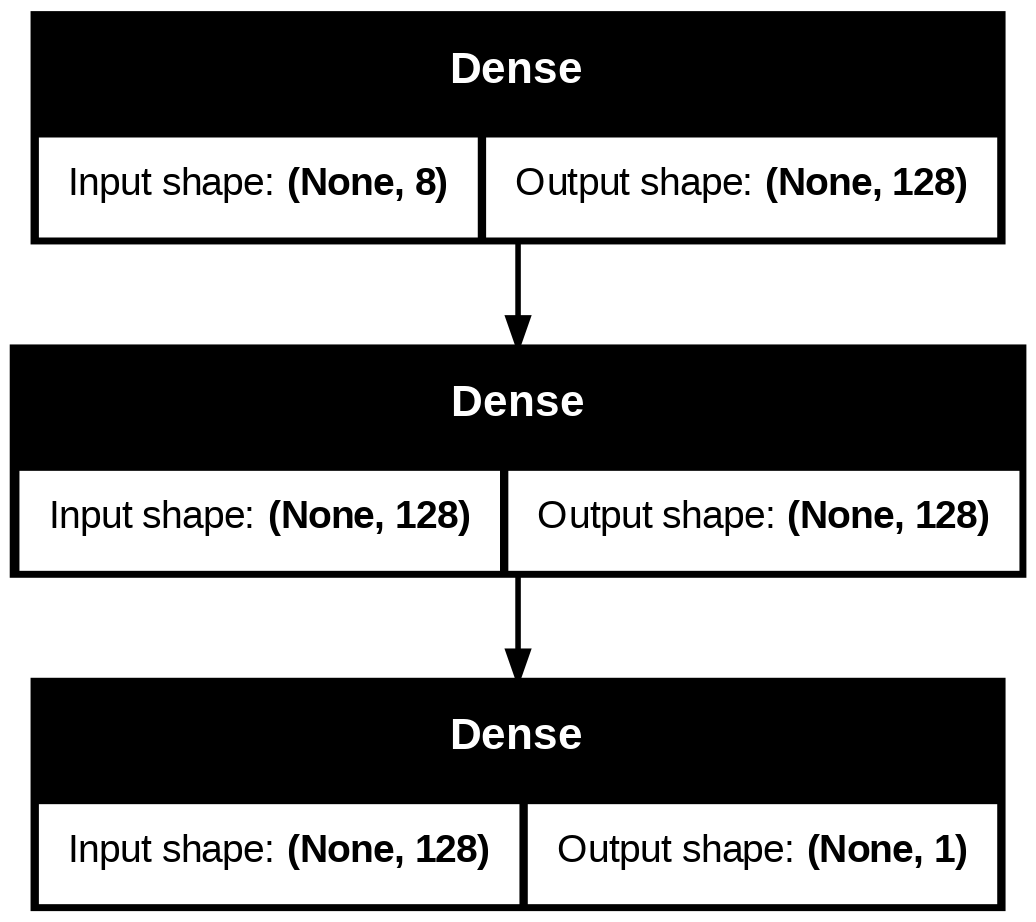

In [41]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [45]:
povijest=model3.fit(x_train, y_train, verbose=2, epochs=10, batch_size=32)

Epoch 1/10
516/516 - 2s - 3ms/step - loss: 0.2955 - mae: 0.3701
Epoch 2/10
516/516 - 1s - 2ms/step - loss: 0.3006 - mae: 0.3684
Epoch 3/10
516/516 - 1s - 2ms/step - loss: 0.3731 - mae: 0.3682
Epoch 4/10
516/516 - 1s - 2ms/step - loss: 0.3267 - mae: 0.3628
Epoch 5/10
516/516 - 1s - 2ms/step - loss: 0.2835 - mae: 0.3603
Epoch 6/10
516/516 - 1s - 2ms/step - loss: 0.2986 - mae: 0.3576
Epoch 7/10
516/516 - 2s - 3ms/step - loss: 0.2857 - mae: 0.3574
Epoch 8/10
516/516 - 1s - 2ms/step - loss: 0.2881 - mae: 0.3549
Epoch 9/10
516/516 - 1s - 2ms/step - loss: 0.2917 - mae: 0.3537
Epoch 10/10
516/516 - 1s - 2ms/step - loss: 0.2731 - mae: 0.3515


In [46]:
povijest.history['loss']

[0.2955183982849121,
 0.30061936378479004,
 0.37311339378356934,
 0.3267221748828888,
 0.283537358045578,
 0.29860720038414,
 0.28570297360420227,
 0.2880748510360718,
 0.2917127311229706,
 0.2730683982372284]

In [47]:
povijest.history['mae']

[0.3701101839542389,
 0.36841413378715515,
 0.36815038323402405,
 0.36278945207595825,
 0.36027973890304565,
 0.35757339000701904,
 0.3574362099170685,
 0.3548983335494995,
 0.35373401641845703,
 0.3515477776527405]

In [49]:
model3.predict(x_test)[:5]

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.43324575],
       [1.1969255 ],
       [4.839194  ],
       [2.3757198 ],
       [2.6174002 ]], dtype=float32)

In [50]:
y_test[:5]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [52]:
test_mse, test_mae = model3.evaluate(x_test, y_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2829 - mae: 0.3567


In [53]:
print('MSE test: {:.4f}'.format(test_mse))
print('MAE test: {:.4f}'.format(test_mae))

MSE test: 0.2878
MAE test: 0.3579
